# SPOT THE MASK
_KTM, 19 Aug 2020_

In [1]:
# fastai imports
from fastai.vision import *

# custom imports
import os

## 0. GPU?

In [2]:
torch.cuda.is_available()

True

## 1. Data

In [3]:
os.listdir('./')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'data',
 'spot_the_mask_v01.ipynb',
 'spot_the_mask_v02.ipynb',
 'spot_the_mask_v03.ipynb']

In [4]:
os.listdir('./data')

['images', 'images.zip', 'models', 'sample_sub_v2.csv', 'train_labels.csv']

In [5]:
os.listdir('./data/images/')

['aadawlxbmapqrblgxyzarhjasgiobu.png',
 'aajjpjqlqyywucvkzuwsqpbxxyqiih.jpg',
 'aalpjcukdicembbvukraexfyxkmsnd.jpg',
 'aamrmacbsylkbahdhvcfmeqvgyjopc.jpg',
 'aaqrdyfhhsdwjiykofhsexfdamezlk.jpg',
 'ablhcfuyqnkcanakxmpreufqycpgqs.jpg',
 'abpxvdfyhaaohzcrngcucmhffwizxs.jpg',
 'acbcufgusmnchzbuiuxluaizkqvobc.jpg',
 'aciificrosunmvbdqgkbtchpzawkkq.jpg',
 'aclkjfvackiieiznzfcwienplielrj.jpg',
 'acrbwwcknudlvwfjvfbreeatynhfov.jpg',
 'aelkivmayxgsdjosiibfgmkvfrjvjk.jpg',
 'aelzzshpfxerelefnkatpczktuxjln.jpg',
 'aeoznpwjxjsawhiousrpjrxmeltnkw.jpg',
 'afmzqimbtnqmlobrcdmwrejtjqlcxf.png',
 'afolbmlyqayubtqtlsqdafbvzreajk.jpg',
 'agjhrdfqyvzjoivmtbrvshymsiqocu.jpg',
 'ahntiidispqylcvpooobbrdsimenol.jpg',
 'ahpuycvwilxiipkimwzumzvwtiegom.jpg',
 'ahragsfmvjjtciuuzvgbuahoqpjkly.jpg',
 'ahswlzuhcgpyjumleocamsdiulqqlj.jpg',
 'ahxmuirkfmvybugologcdxlconsfbs.jpg',
 'ajchmdwktqtwitqgneeafxhidxamkg.jpg',
 'ajfldfzndyfdodmknemntrnnbmyjry.jpg',
 'ajnjnkvstqesvfohaptobyasrkmcnq.jpg',
 'ajobyfcipqvzgtddqywsphg

In [6]:
path = Path('./data')

In [7]:
data = ImageDataBunch.from_csv(path,
    folder='images',
    csv_labels='train_labels.csv',
    valid_pct=0.2,
    fn_col='image',
    label_col='target',
    header='infer',
    no_check=False,
    ds_tfms=tfms,
    size=128)

In [8]:
ds = data.train_ds

## 2. Explore Images and Labels

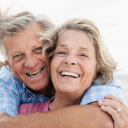

In [9]:
img, label = ds[34]
img

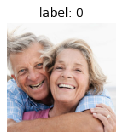

In [10]:
img.show(figsize=(2,2), title='label: ' + str(label))

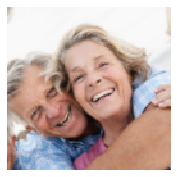

In [11]:
img.rotate(35).show()

## Load the Learner

In [12]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

## Learning Finder: `lr_find`

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


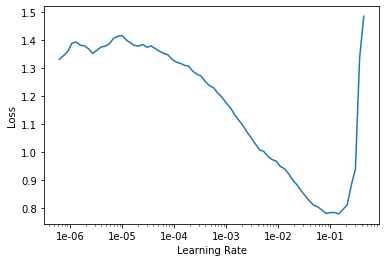

In [14]:
learn.recorder.plot()

## Train

In [15]:
learn.fit(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.881521,1.526052,0.689655,00:54
1,0.500859,0.490118,0.892720,00:59
2,0.326524,0.259635,0.915709,01:01
